# Analyzing Auto MPG dataset

This assignment loads a dataset, performs some minor cleanup and transformation tasks, then uses exploratory data analysis to learn about the distribution of variables and the relationship between variables.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

datasource = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
colnames = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 
            'model year', 'origin', 'car name']

mpg = pd.read_table(datasource, sep = "\s+", names = colnames, header = None)
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


**The data documentation indicated that some of the horsepower data is marked as missing with a '?'.  We convert the column to numeric, using `errors = 'coerce'` to convert '?' to NaN values.**

In [2]:
mpg['horsepower'] = pd.to_numeric(mpg['horsepower'], errors = 'coerce')

**Next we convert origin column values 1, 2, and 3 respectively to ‘USA’, ‘Asia’, and ‘Europe’.**

In [3]:
mpg['origin'].replace({1:'USA',2:'Asia',3:'Europe'}, inplace = True)
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,USA,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,USA,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,USA,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,USA,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,USA,ford torino


**Next we create a bar plot that shows the distribution by cylinders.**

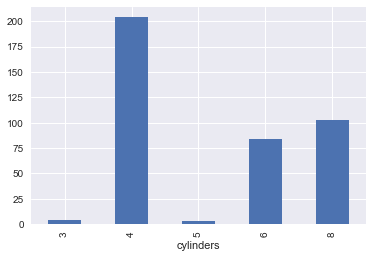

In [4]:
mpg.groupby('cylinders')['cylinders'].count().plot.bar()

**It's clear that odd-numbered cylinders are much less popular than even-numbered cylinders.**

**Next we create a scatterplot that shows the relationship between horsepower and weight.**

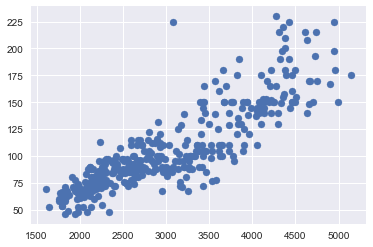

In [5]:
plt.scatter(mpg.weight, mpg.horsepower)

**From this we see that generally as weight rises, so does horsepower.**

**For our custom question, we use a bar plot to see the relationship between origin and mpg.**

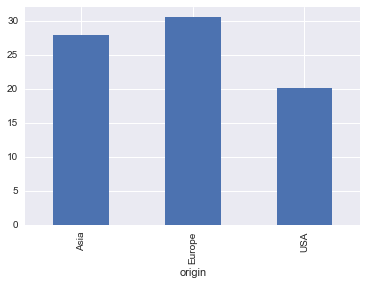

In [6]:
mpg.groupby('origin')['mpg'].mean().plot.bar()

**This bar plot indicates that cars in Europe average the highest MPG, while cars in the USA average the lowest MPG.**